### Prediction a number based on combination of variables

In [1]:
import tensorflow as tf

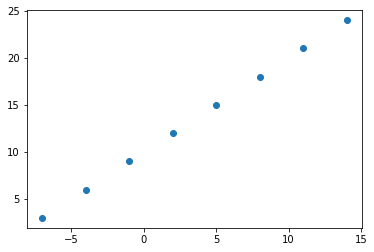

In [2]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0,6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x,y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
X = tf.constant(x)
Y = tf.constant(y)
X, X.shape,Y, Y.shape

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 TensorShape([8]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 TensorShape([8]))

### Create a model

1. Create a model
2. Compiling the model - with loss function and optimizer
3. Fitting a model

In [7]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Model compile
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
#model.fit(X,Y, epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 251ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [38]:
# predict
model.predict([17.0])

1/1 [==============================] - 0s 65ms/step


array([[29.007704]], dtype=float32)

### Improve the model

In [42]:
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Model compile
model.compile(
    loss=tf.keras.losses.mae, # mae = mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # SGD = stochastic gradient descent
    metrics=["mae"]
)

# 3. Fit the model
#model.fit(X,Y, epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

model.predict([17.0])

Epoch 1/100
1/1 [==============================] - 0s 371ms/step - loss: 13.1070 - mae: 13.1070
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4179 - mae: 12.4179
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7371 - mae: 11.7371
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0614 - mae: 11.0614
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3867 - mae: 10.3867
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7082 - mae: 9.7082
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0222 - mae: 9.0222
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3255 - mae: 8.3255
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6150 - mae: 7.6150
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8875 - mae: 6.8875
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

array([[26.22188]], dtype=float32)